# K-nearest neighbours

In [1]:
from sklearn import datasets,utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance_matrix
import random

In [16]:
class knn():
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.classification_grid = None
        self.k = 0
        
    def get_predicted_class(self, reference_point, datapoints, k):
        """
        Calculates the distance to all datapoints, finds the k nearest neighbours and predicts the 
        classmemberships based on neighbours.
        """
        #calculate distance to all datapoints
        distances_neighbours = []
        for n in range(len(datapoints)):
            distances_neighbours.append([np.linalg.norm(reference_point - datapoints[n]), n])
        distances_neighbours.sort()
        
        #Get knn
        knn_index = np.array(distances_neighbours)[:k,1]
        knn_labels = [self.y_train[int(index)] for index in knn_index]

        # Predict class for reference point
        classes = {np.sum(np.sum(np.array(knn_labels)==0)):0, 
                   np.sum(np.sum(np.array(knn_labels)==1)):1, 
                   np.sum(np.sum(np.array(knn_labels)==2)):2}
        most_common = max(classes.keys())

        return classes[most_common]

        
    def fit(self, k, dim_0=0, dim_1=1):
        """
        Generates a contourplot that shows the decisionboundarys for a given k.
        """
        
        X1_range = np.linspace(min(self.X_train[:,dim_0])-1, max(self.X_train[:,dim_0])+1,50)
        X2_range = np.flip(np.linspace(min(self.X_train[:,dim_1])-1, max(self.X_train[:,dim_1])+1,50))
        distances_to_nn = []
        classification = []
        for x2,i in zip(X2_range, range(len(X2_range))):
            classification.append([])
            for x1,j in zip(X1_range, range(len(X1_range))):
                
                classification[i].append(self.get_predicted_class([x1, x2], self.X_train[:,[dim_0,dim_1]], k=k))
        classification = np.array(classification)
        self.classification_grid = classification
        
        x_grid, y_grid = np.meshgrid(X1_range, X2_range) 
        
        fig,ax = plt.subplots()

        ax.contourf(x_grid, y_grid ,classification)
        color = ['r','g','b']
        plt.scatter(self.X_train[:,dim_0], self.X_train[:,dim_1], c=self.y_train, edgecolors='white')

    def predict(self, X_test, y_test, k):
        """
        Predicts the class belongings for X_test and compares it to y_test.
        Returns the predicted class belongings and the accuracy for the predictions.
        """
        y_predict = []
        
        for x in X_test:
            y_predict.append(self.get_predicted_class(x, self.X_train, k=k))
            
        y_predict = np.array(y_predict)
        accuracy = np.sum(y_predict==y_test) / len(y_test)
    
        return np.transpose(y_predict), accuracy
     
    

(array([1, 1, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1]), 1.0)

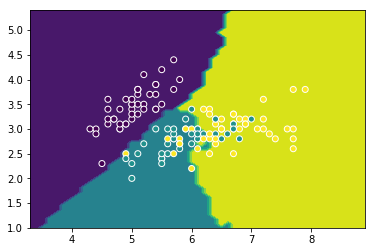

In [19]:
#Load Iris dataset
iris = datasets.load_iris()
#iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_X, iris_y = utils.shuffle(iris['data'], iris['target'])

#split into test and train data
x_train, y_train = iris_X[0:130], iris_y[0:130]
x_test, y_test = iris_X[130:], iris_y[130:]

# Runn knn classification on iris
k = 15
knn_iris = knn(x_train, y_train)
knn_iris.fit(k, dim_0=0, dim_1=1)

knn_iris.predict(x_test, y_test, k)

(array([1, 1, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 1, 1, 0, 0, 0]),
 0.6111111111111112)

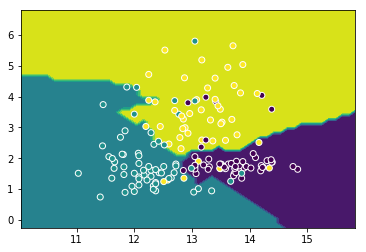

In [18]:
#Load wine dataser
wine = datasets.load_wine()
wine_X, wine_y = utils.shuffle(wine['data'], wine['target'])

#split into test and train data
x_train, y_train = wine_X[0:160], wine_y[0:160]
x_test, y_test = wine_X[160:], wine_y[160:]

# Runn knn classification on wine
k = 8
knn_wine = knn(x_train, y_train)
knn_wine.fit(k, dim_0=0, dim_1=1)

knn_wine.predict(x_test, y_test, k)